In [157]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

conflict_data = pd.read_csv('E:/Cours/programmation/Data Science/Pratiques/data/Conflict_Data_for_Cameroon.csv')
conflict_data.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,NaN,NaN,#event+code,NaN,#date+occurred,#date+year,NaN,#event+type,NaN,#group+name+first,...,#loc+name,#geo+lat,#geo+lon,NaN,#meta+source,NaN,#description,#affected+killed,NaN,#country+code
1,6217855.0,120.0,CAO2599,2599.0,2019-10-25,2019,1.0,Violence against civilians,Attack,Military Forces of Cameroon (1982-),...,Malende,4.5991,9.4922,1.0,Mimi Mefo,New media,"On October 25, 2019, Military Forces reportedl...",1,1.572313e+09,CMR
2,6217828.0,120.0,CAO2594,2594.0,2019-10-25,2019,1.0,Battles,Armed clash,Military Forces of Cameroon (1982-),...,Jakiri,6.1000,10.6500,2.0,Mimi Mefo,New media,"On October 25, 2019, the Military Forces repor...",2,1.572313e+09,CMR
3,6217849.0,120.0,CAO2600,2600.0,2019-10-25,2019,1.0,Violence against civilians,Attack,Military Forces of Cameroon (1982-),...,Mbalangi,4.5010,9.4632,1.0,Mimi Mefo,New media,"On October 25, 2019, military forces reportedl...",1,1.572313e+09,CMR
4,6217843.0,120.0,CAO2595,2595.0,2019-10-25,2019,1.0,Violence against civilians,Attack,Military Forces of Cameroon (1982-),...,Jakiri,6.1000,10.6500,2.0,Mimi Mefo,New media,"On October 25, 2019, the military forces repor...",0,1.572313e+09,CMR


# Data Wrangling


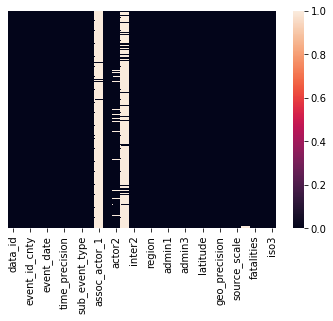

In [158]:
# Source scale
# Remove useless data
# conflict_data[conflict_data.data_id.apply(lambda x: x.isnumeric())]
conflict_data = conflict_data.dropna(subset=['data_id']) 

sns.heatmap(conflict_data.isnull(), yticklabels=False)
#conflict_data['year'].plot.bar();

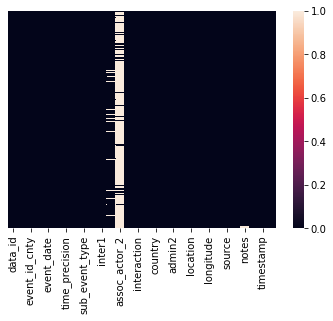

In [159]:
conflict_data.drop("assoc_actor_1", axis=1, inplace=True)
sns.heatmap(conflict_data.isnull(), yticklabels=False)

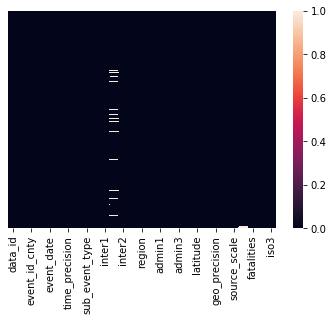

In [160]:
conflict_data.drop("assoc_actor_2", axis=1, inplace=True)
sns.heatmap(conflict_data.isnull(), yticklabels=False)

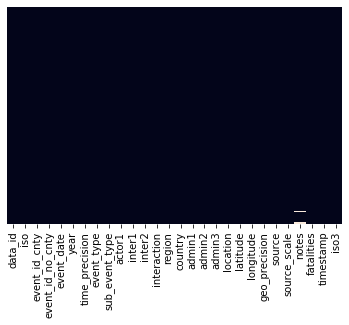

In [161]:
conflict_data.drop("actor2", axis=1, inplace=True)
sns.heatmap(conflict_data.isnull(), yticklabels=False, cbar=False)
#conflict_data.isnull().sum()

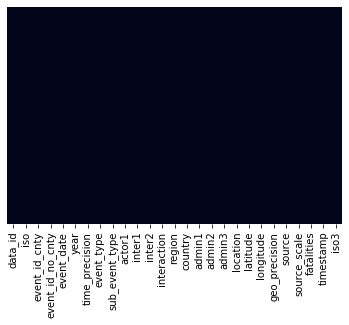

In [162]:
conflict_data.drop("notes", axis=1, inplace=True)
sns.heatmap(conflict_data.isnull(), yticklabels=False, cbar=False)

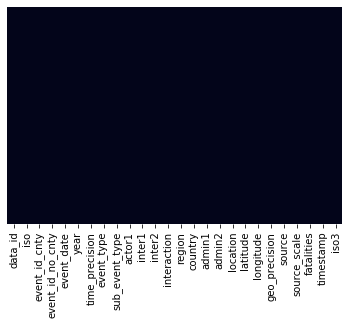

In [166]:
conflict_data.drop("admin3", axis=1, inplace=True)
sns.heatmap(conflict_data.isnull(), yticklabels=False, cbar=False)

In [168]:
conflict_data.isnull().sum()

data_id             0
iso                 0
event_id_cnty       0
event_id_no_cnty    0
event_date          0
year                0
time_precision      0
event_type          0
sub_event_type      0
actor1              0
inter1              0
inter2              0
interaction         0
region              0
country             0
admin1              0
admin2              0
location            0
latitude            0
longitude           0
geo_precision       0
source              0
source_scale        0
fatalities          0
timestamp           0
iso3                0
dtype: int64

# Data Analysing

In [169]:
# The number of events from 1997 to 2015

data_97_15 = conflict_data.loc[(conflict_data['year'] >= '1997') & (conflict_data['year'] <= '2015')]
conflicts = len(data_97_15)
print(repr(conflicts) + ' events from 1997 to 2015.')

# The number of events since 2016

data_16_19 = conflict_data.loc[(conflict_data['year'] >= '2016') & (conflict_data['year'] <= '2019')]
conflicts = len(data_16_19)
print(repr(conflicts) + ' events since 2016.')


478 events from 1997 to 2015.
2065 events since 2016.


In [170]:
# Event Locations (2016 - 2018)

location_16_19 = data_16_19['location'].unique()
print(repr(len(location_16_18)) + ' Location of events since 2016\n')

# Max events in the location with the most events from 2016 to 2019
max_events = data_16_19['location'].value_counts().max()
print(repr(max_events) + ' events were made in the location with the most events from 2016 to 2019.')

374 Location of events since 2016

118 events were made in the location with the most events from 2016 to 2019.


Tolal events each year 

723 events were made in the year with the most events.

2 events were made in the year with the less events.


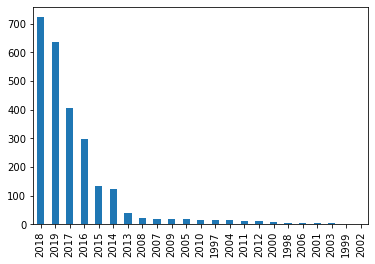

In [171]:
# Graphical representation total events each year
print('Tolal events each year \n')
conflict_data['year'].value_counts().plot.bar()
# Max events in the year with the most events
max_year = conflict_data['year'].value_counts().max()
print(repr(max_year) + ' events were made in the year with the most events.\n')
# Min events in the year with the most events
min_year = conflict_data['year'].value_counts().min()
print(repr(min_year) + ' events were made in the year with the less events.')

Tolal events each year 



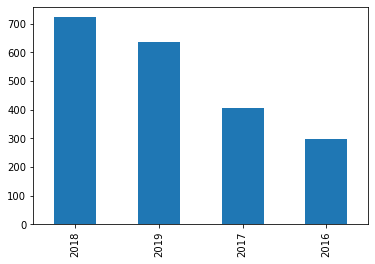

In [172]:
# Graphical representation total events from 2016 to 2019
print('Tolal events each year \n')
data_16_19['year'].value_counts().plot.bar()

In [ ]:
# List event types

conflict_data.drop(conflict_data.index[0])
event_type = conflict_data['event_type'].unique()
print('Event types:' + str(event_type))

Tolal event types each year 

965 event types were made in the year with the most events.

95 event types were made in the year with the less events.


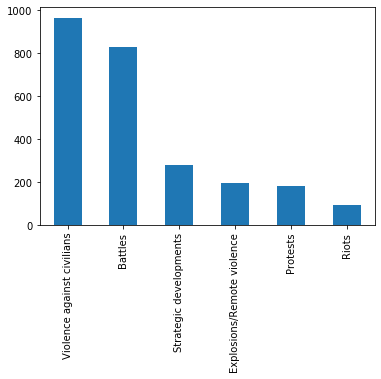

In [179]:
print('Tolal event types each year \n')
conflict_data['event_type'].value_counts().plot.bar()
# Max events in the year with the most events
max_year = conflict_data['event_type'].value_counts().max()
print(repr(max_year) + ' event types were made in the year with the most events.\n')
# Min events in the year with the most events
min_year = conflict_data['event_type'].value_counts().min()
print(repr(min_year) + ' event types were made in the year with the less events.')